In [1]:
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from PIL                 import Image
import os
print("Diretório de trabalho atual:", os.getcwd())

Diretório de trabalho atual: C:\Users\felip\Desktop\Streamlit EBAC\Profissão Cientista de Dados M19 Pratique 1\py


In [41]:
bank_raw = pd.read_csv('..\\data\\input\\bank-additional-full.csv', sep=';')
bank = bank_raw.copy()
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
max_age = int(bank.age.max())
min_age = int(bank.age.min())
idades = [min_age, max_age]
idades

[17, 98]

In [44]:
bank_raw.shape

(41188, 21)

In [45]:
bank = bank[(bank['age'] >= idades[0]) & (bank['age'] <= idades[1])]

In [46]:
bank.shape

(41188, 21)

In [47]:
bank_raw_target_perc = bank_raw['y'].value_counts(normalize = True).to_frame()*100
bank_raw_target_perc = bank_raw_target_perc.sort_index()
bank_raw_target_perc

,proportion
y,
no,88.734583
yes,11.265417


In [48]:
bank_target_perc = bank['y'].value_counts(normalize = True).to_frame()*100
bank_target_perc = bank_target_perc.sort_index()
bank_target_perc

,proportion
y,
no,88.734583
yes,11.265417


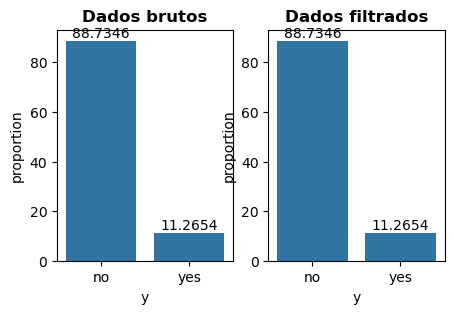

In [49]:
%matplotlib inline

plt.close()

fig, ax = plt.subplots(1, 2, figsize = (5,3))

# Dados brutos
sns.barplot(x = bank_raw_target_perc.index, y = 'proportion', data = bank_raw_target_perc, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Dados brutos', fontweight ="bold")

# Dados filtrados
sns.barplot(x = bank_target_perc.index, y = 'proportion', data = bank_target_perc, ax = ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Dados filtrados', fontweight ="bold")

plt.show()

In [50]:
bank['job'].unique().tolist()

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'student']

In [51]:
jobs_list = bank['job'].unique().tolist()
print('Profissões disoponíveis:',job_list)

Profissões disoponíveis: ['technician', 'services', 'management', 'blue-collar', 'admin.', 'student', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed', 'unknown', 'retired']


In [58]:
bank.shape

(5029, 21)

In [55]:
jobs_selected = ['housemaid','services']

In [57]:
bank = bank[bank['job'].isin(jobs_selected)].reset_index(drop=True)

In [59]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
